In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
STdf = pd.read_csv('../data/Preseason/Aggregate/Summaries/2025mean-player-batting-order.csv') 
Pdf = pd.read_csv('../../mlb-player-predictions/predictions/2025/batter_predictions_2025_022325.csv') # this repository is private right now, but we'll change that soon!
Pdf['player'] = Pdf['Name'].apply(lambda x: x.strip())
df = pd.merge(STdf,Pdf,left_on='player',right_on='player',how='inner')

In [3]:
df['PA_forecast'] = np.round(2*(-9*df['avg']+380),0) # using an empirically derived formula to estimate PA
df['PAdiff'] = np.abs(df['PA_forecast']-df['PA'].astype('float'))


In [4]:
df = df.sort_values(by='avg',ascending=True)
sdf = df.loc[(df['ngames']>5)]

print(sdf[['player', 'avg', 'ngames', 'team','PA','PA_forecast']])

sdf.to_csv('2025-PA-forecast.csv',index=False)

            player   avg  ngames team   PA  PA_forecast
259  Marcus Semien  1.00      21  TEX  657        742.0
78      Masyn Winn  1.00      16  STL  628        742.0
86        Ian Happ  1.00      14  CHC  644        742.0
189      CJ Abrams  1.00      18  WSH  585        742.0
99     Ketel Marte  1.00      20   AZ  620        742.0
..             ...   ...     ...  ...  ...          ...
20     Jake Meyers  7.86      14  HOU  409        619.0
91       Jon Berti  8.00      12  CHC  184        616.0
120     Andy Pages  8.15      13  LAD  219        613.0
382  Oswald Peraza  8.24      17  NYY  231        612.0
9     Kevin Newman  8.44      18  LAA  219        608.0

[373 rows x 6 columns]


In [5]:
df = df.sort_values(by='avg',ascending=True)
sdf = df.loc[(df['avg']<1.2) & (df['ngames']>6)]

print(sdf[['player', 'avg', 'ngames', 'team']])

               player   avg  ngames team
259     Marcus Semien  1.00      21  TEX
139       Steven Kwan  1.00      17  CLE
154     Victor Robles  1.00      18  SEA
291         TJ Friedl  1.00      16  CIN
285      Jarren Duran  1.00      17  BOS
60   Jurickson Profar  1.00      11  ATL
172    Xavier Edwards  1.00      17  MIA
124     Shohei Ohtani  1.00      10  LAD
25        Jose Altuve  1.00      14  HOU
309     Brenton Doyle  1.00      18  COL
183  Francisco Lindor  1.00      18  NYM
322    Jonathan India  1.00      18   KC
99        Ketel Marte  1.00      20   AZ
189         CJ Abrams  1.00      18  WSH
86           Ian Happ  1.00      14  CHC
78         Masyn Winn  1.00      16  STL
32    Lawrence Butler  1.00      15  ATH
216       Luis Arraez  1.06      18   SD


Text(0, 0.5, 'difference in predicted PA')

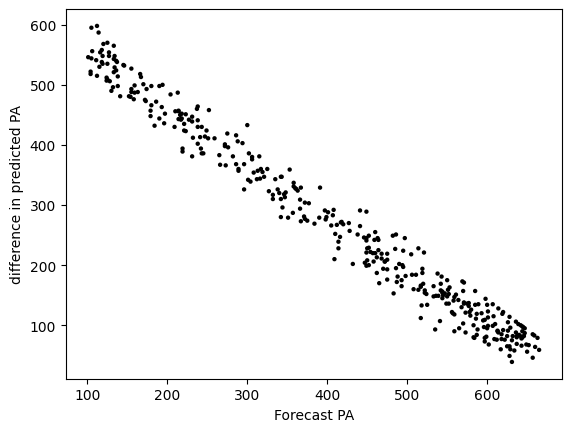

In [6]:
df = df.sort_values(by='PAdiff',ascending=False)
plt.scatter(df['PA'],df['PAdiff'],edgecolor='none',facecolor='black',s=10.)
plt.xlabel('Forecast PA')
plt.ylabel('difference in predicted PA')